In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
import pandas as pd
from sea_breeze import utils

In [2]:
f_a = xr.open_zarr("/g/data/ng72/ab4502/sea_breeze_detection/aus2200_smooth_s4/F_mjo-elnino2016_201601010000_201601312300.zarr/")
h_a = xr.open_zarr("/g/data/ng72/ab4502/sea_breeze_detection/aus2200_smooth_s4/fuzzy_201301010000_201802282300.zarr/")
sbi_a = xr.open_zarr("/g/data/ng72/ab4502/sea_breeze_detection/aus2200_smooth_s4/sbi_mjo-elnino2016_201601010100_201601312300.zarr/")

f_am = xr.open_mfdataset("/g/data/ng72/ab4502/sea_breeze_detection/aus2200_smooth_s4/filters/filtered_mask_no_hourly_change_F_201601*",engine="zarr")
h_am = xr.open_mfdataset("/g/data/ng72/ab4502/sea_breeze_detection/aus2200_smooth_s4/filters/filtered_mask_no_hourly_change_fuzzy_201601*",engine="zarr")
sbi_am = xr.open_mfdataset("/g/data/ng72/ab4502/sea_breeze_detection/aus2200_smooth_s4/filters/filtered_mask_no_hourly_change_sbi_201601*",engine="zarr")

In [3]:
f_e = xr.open_zarr("/g/data/ng72/ab4502/sea_breeze_detection/era5/F_201601010000_201601312300.zarr/")
h_e = xr.open_zarr("/g/data/ng72/ab4502/sea_breeze_detection/era5/fuzzy_201301010000_201802282300.zarr/")
sbi_e = xr.open_zarr("/g/data/ng72/ab4502/sea_breeze_detection/era5/sbi_201601010000_201601312300.zarr/")

f_em = xr.open_mfdataset("/g/data/ng72/ab4502/sea_breeze_detection/era5/filters/filtered_mask_no_hourly_change_F_201601*",engine="zarr")
h_em = xr.open_mfdataset("/g/data/ng72/ab4502/sea_breeze_detection/era5/filters/filtered_mask_no_hourly_change_fuzzy_201601*",engine="zarr")
sbi_em = xr.open_mfdataset("/g/data/ng72/ab4502/sea_breeze_detection/era5/filters/filtered_mask_no_hourly_change_sbi_201601*",engine="zarr")

In [4]:
F_levels=[-100,-50,-20,-10,-5,-2,2,5,10,20,50,100]
sbi_levels=np.linspace(0,1,11)
fuzzy_levels=np.linspace(0,0.5,11)

lat_slice = slice(-36,-30)
lon_slice = slice(113,119)
t = "2016-01-06 08:00"

base_path = "/g/data/ng72/ab4502/"
exp_id="mjo-elnino2016"

_, _, aus2200_uas, aus2200_vas, _, _, _ = utils.load_aus2200_filtering_data(
    lon_slice,
    lat_slice,
    pd.to_datetime(t) - dt.timedelta(hours=12),
    pd.to_datetime(t) + dt.timedelta(hours=12),
    base_path,
    exp_id)

_, _, era5_uas, era5_vas, _, _, _ = utils.load_era5_filtering_data(
    lon_slice,
    lat_slice,
    pd.to_datetime(t) - dt.timedelta(hours=12),
    pd.to_datetime(t) + dt.timedelta(hours=12),
    base_path)

In [5]:
scale=100
ca=25
ce=2

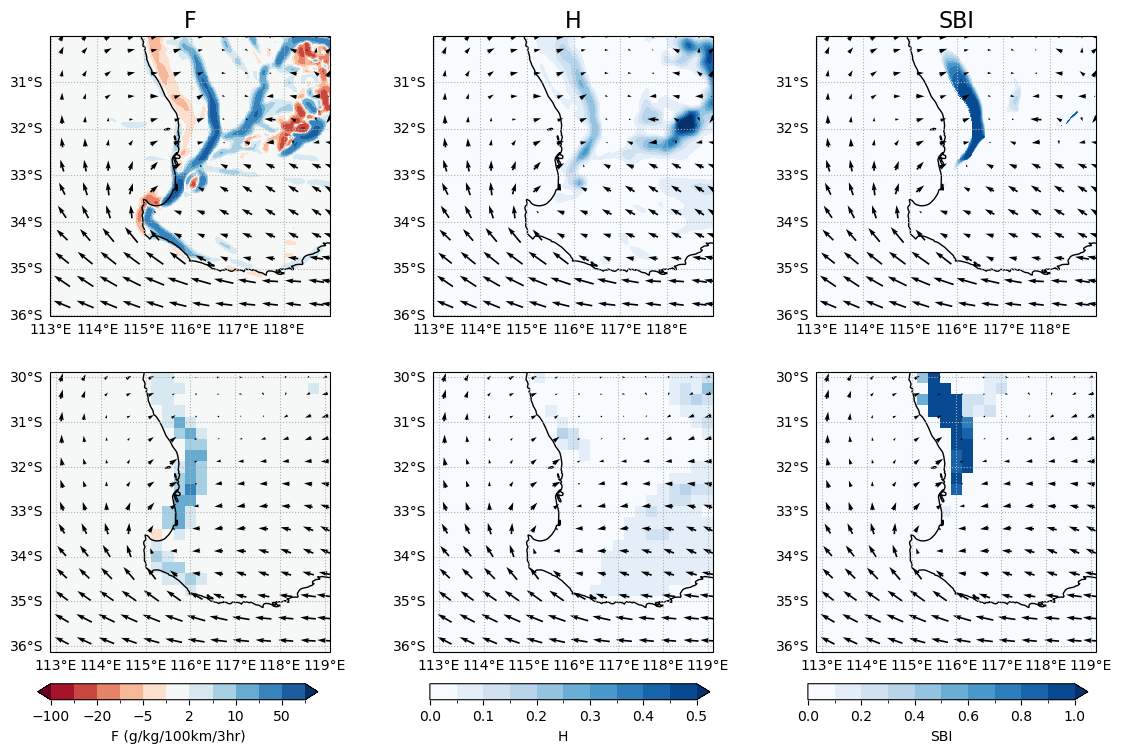

In [6]:
plt.figure(figsize=[14,8])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
f_a.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("F",size=16)
ax.gridlines(ls=":",draw_labels=["left","bottom"])


ax=plt.subplot(2,3,4,projection=ccrs.PlateCarree())
cf=f_e.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("")
ax.gridlines(ls=":",draw_labels=["left","bottom"])


ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
h_a.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("H",size=16)
ax.gridlines(ls=":",draw_labels=["left","bottom"])

ax=plt.subplot(2,3,5,projection=ccrs.PlateCarree())
ch=h_e.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("")
ax.gridlines(ls=":",draw_labels=["left","bottom"])

ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
sbi_a.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("SBI",size=16)
ax.gridlines(ls=":",draw_labels=["left","bottom"])

ax=plt.subplot(2,3,6,projection=ccrs.PlateCarree())
csbi=sbi_e.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("")
ax.gridlines(ls=":",draw_labels=["left","bottom"])

cb=plt.colorbar(cf,plt.axes([0.13,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("F (g/kg/100km/3hr)")
cb=plt.colorbar(ch,plt.axes([0.41,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("H")
cb=plt.colorbar(csbi,plt.axes([1-0.32,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("SBI")

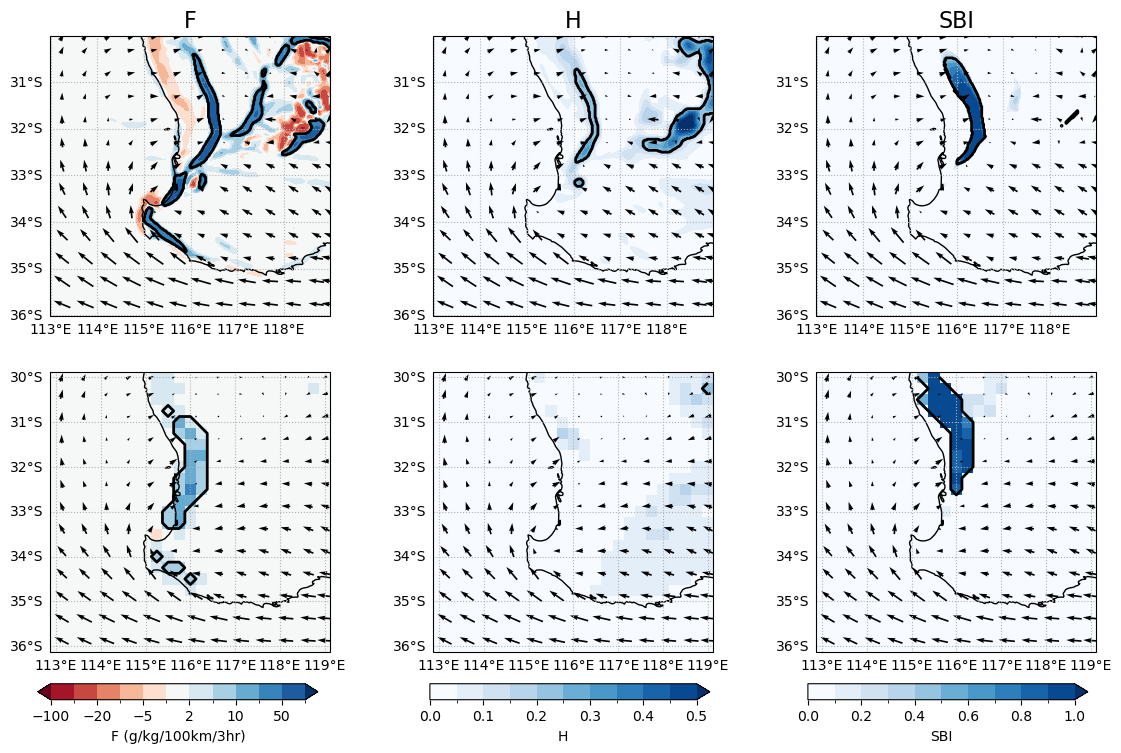

In [7]:

plt.figure(figsize=[14,8])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
f_a.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(f_a.sel(lat=lat_slice,lon=lon_slice,time=t).F > f_am.mask.threshold,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("F",size=16)


ax=plt.subplot(2,3,4,projection=ccrs.PlateCarree())
cf=f_e.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(f_e.sel(lat=lat_slice,lon=lon_slice,time=t).F > f_em.mask.threshold,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("")


ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
h_a.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(h_a.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__ > h_am.mask.threshold,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("H",size=16)


ax=plt.subplot(2,3,5,projection=ccrs.PlateCarree())
ch=h_e.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(h_e.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__ > h_em.mask.threshold,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("")




ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
sbi_a.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(sbi_a.sel(lat=lat_slice,lon=lon_slice,time=t).sbi > sbi_am.mask.threshold,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("SBI",size=16)


ax=plt.subplot(2,3,6,projection=ccrs.PlateCarree())
csbi=sbi_e.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(sbi_e.sel(lat=lat_slice,lon=lon_slice,time=t).sbi > sbi_em.mask.threshold,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("")


cb=plt.colorbar(cf,plt.axes([0.13,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("F (g/kg/100km/3hr)")
cb=plt.colorbar(ch,plt.axes([0.41,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("H")
cb=plt.colorbar(csbi,plt.axes([1-0.32,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("SBI")

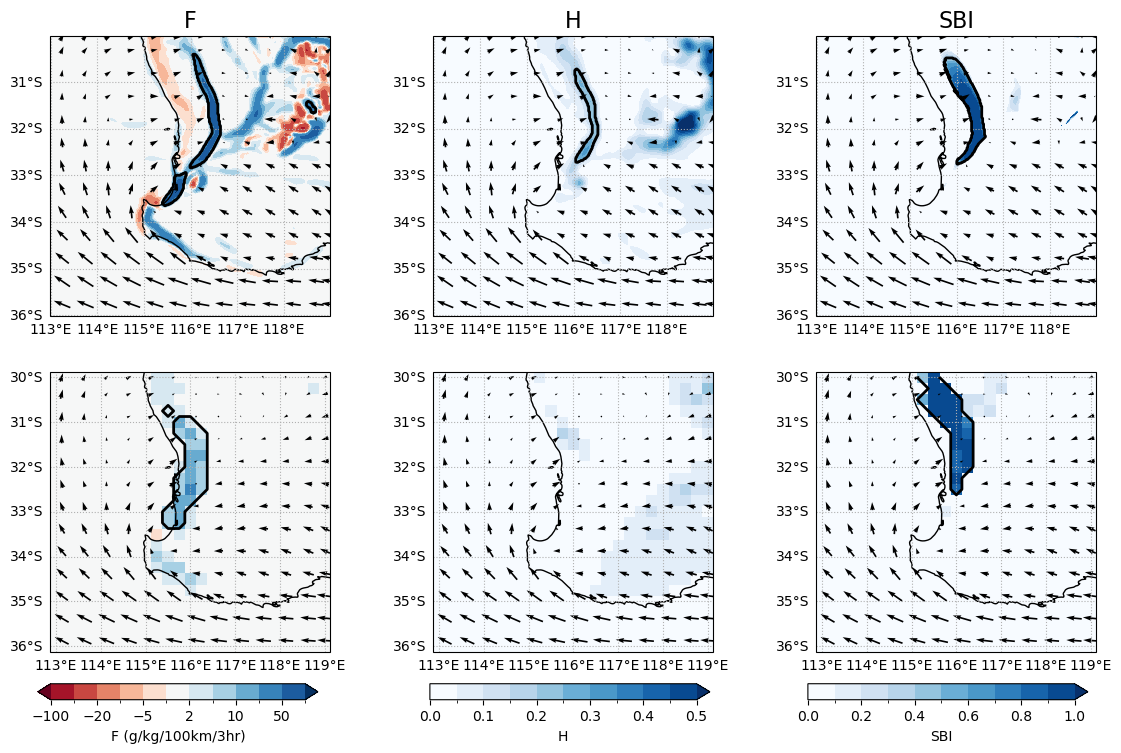

In [8]:

plt.figure(figsize=[14,8])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
f_a.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(f_am.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("F",size=16)


ax=plt.subplot(2,3,4,projection=ccrs.PlateCarree())
cf=f_e.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(f_em.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("")




ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
h_a.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(h_am.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("H",size=16)

ax=plt.subplot(2,3,5,projection=ccrs.PlateCarree())
ch=h_e.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(h_em.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("")




ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
sbi_a.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(sbi_am.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("SBI",size=16)

ax=plt.subplot(2,3,6,projection=ccrs.PlateCarree())
csbi=sbi_e.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(sbi_em.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=2,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=200,
    width=0.006,
    add_guide=False)
plt.title("")


cb=plt.colorbar(cf,plt.axes([0.13,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("F (g/kg/100km/3hr)")
cb=plt.colorbar(ch,plt.axes([0.41,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("H")
cb=plt.colorbar(csbi,plt.axes([1-0.32,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("SBI")

In [9]:
F_levels=[-100,-50,-20,-10,-5,-2,2,5,10,20,50,100]
sbi_levels=np.linspace(0,1,11)
fuzzy_levels=np.linspace(0,0.5,11)

# lat_slice = slice(-16.5,-10.5)
# lon_slice = slice(140,146)
lat_slice, lon_slice = utils.get_aus_bounds()
#t = "2016-01-07 04:00"
t = "2016-01-06 08:00"

base_path = "/g/data/ng72/ab4502/"
exp_id="mjo-elnino2016"

_, _, aus2200_uas, aus2200_vas, _, _, _ = utils.load_aus2200_filtering_data(
    lon_slice,
    lat_slice,
    pd.to_datetime(t) - dt.timedelta(hours=12),
    pd.to_datetime(t) + dt.timedelta(hours=12),
    base_path,
    exp_id)

_, _, era5_uas, era5_vas, _, _, _ = utils.load_era5_filtering_data(
    lon_slice,
    lat_slice,
    pd.to_datetime(t) - dt.timedelta(hours=12),
    pd.to_datetime(t) + dt.timedelta(hours=12),
    base_path)

In [20]:
ca=100
ce=8
scale=200
width=0.003

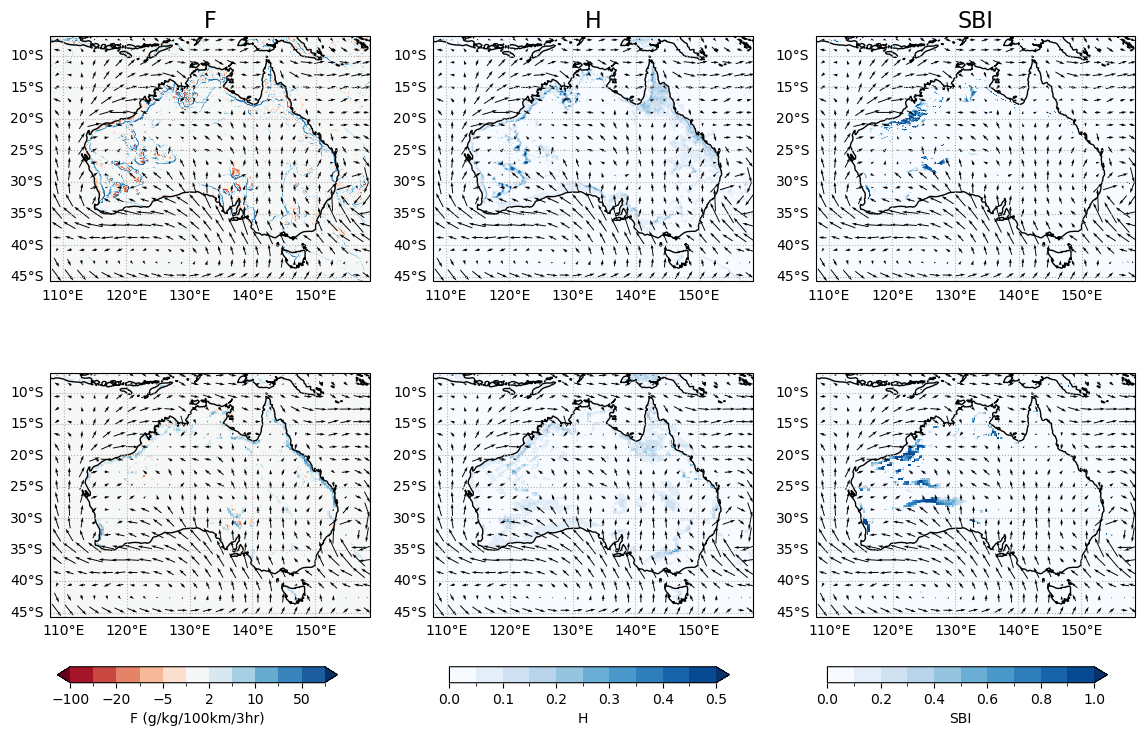

In [21]:
plt.figure(figsize=[14,8])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
f_a.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("F",size=16)
ax.gridlines(ls=":",draw_labels=["left","bottom"])


ax=plt.subplot(2,3,4,projection=ccrs.PlateCarree())
cf=f_e.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("")
ax.gridlines(ls=":",draw_labels=["left","bottom"])


ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
h_a.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("H",size=16)
ax.gridlines(ls=":",draw_labels=["left","bottom"])

ax=plt.subplot(2,3,5,projection=ccrs.PlateCarree())
ch=h_e.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("")
ax.gridlines(ls=":",draw_labels=["left","bottom"])

ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
sbi_a.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("SBI",size=16)
ax.gridlines(ls=":",draw_labels=["left","bottom"])

ax=plt.subplot(2,3,6,projection=ccrs.PlateCarree())
csbi=sbi_e.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("")
ax.gridlines(ls=":",draw_labels=["left","bottom"])

cb=plt.colorbar(cf,plt.axes([0.13,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("F (g/kg/100km/3hr)")
cb=plt.colorbar(ch,plt.axes([0.41,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("H")
cb=plt.colorbar(csbi,plt.axes([1-0.32,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("SBI")

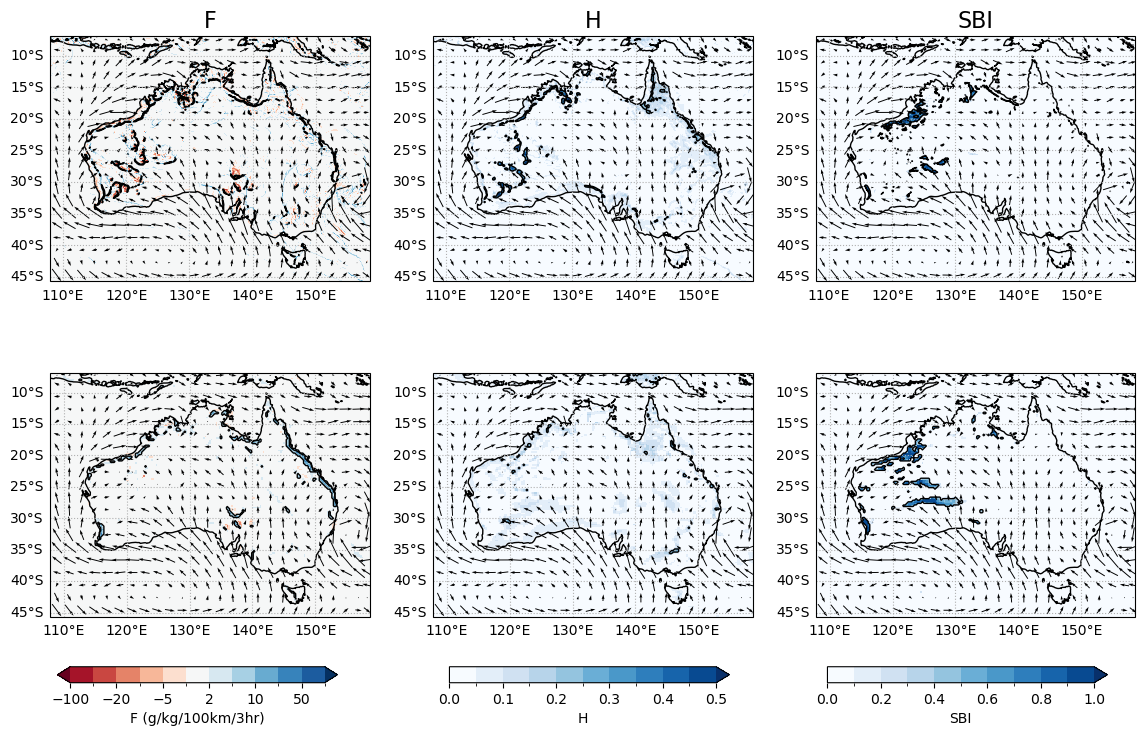

In [23]:

lw=1

plt.figure(figsize=[14,8])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
f_a.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(f_a.sel(lat=lat_slice,lon=lon_slice,time=t).F > f_am.mask.threshold,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("F",size=16)


ax=plt.subplot(2,3,4,projection=ccrs.PlateCarree())
cf=f_e.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(f_e.sel(lat=lat_slice,lon=lon_slice,time=t).F > f_em.mask.threshold,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("")


ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
h_a.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(h_a.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__ > h_am.mask.threshold,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("H",size=16)


ax=plt.subplot(2,3,5,projection=ccrs.PlateCarree())
ch=h_e.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(h_e.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__ > h_em.mask.threshold,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("")




ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
sbi_a.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(sbi_a.sel(lat=lat_slice,lon=lon_slice,time=t).sbi > sbi_am.mask.threshold,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("SBI",size=16)


ax=plt.subplot(2,3,6,projection=ccrs.PlateCarree())
csbi=sbi_e.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(sbi_e.sel(lat=lat_slice,lon=lon_slice,time=t).sbi > sbi_em.mask.threshold,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("")


cb=plt.colorbar(cf,plt.axes([0.13,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("F (g/kg/100km/3hr)")
cb=plt.colorbar(ch,plt.axes([0.41,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("H")
cb=plt.colorbar(csbi,plt.axes([1-0.32,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("SBI")

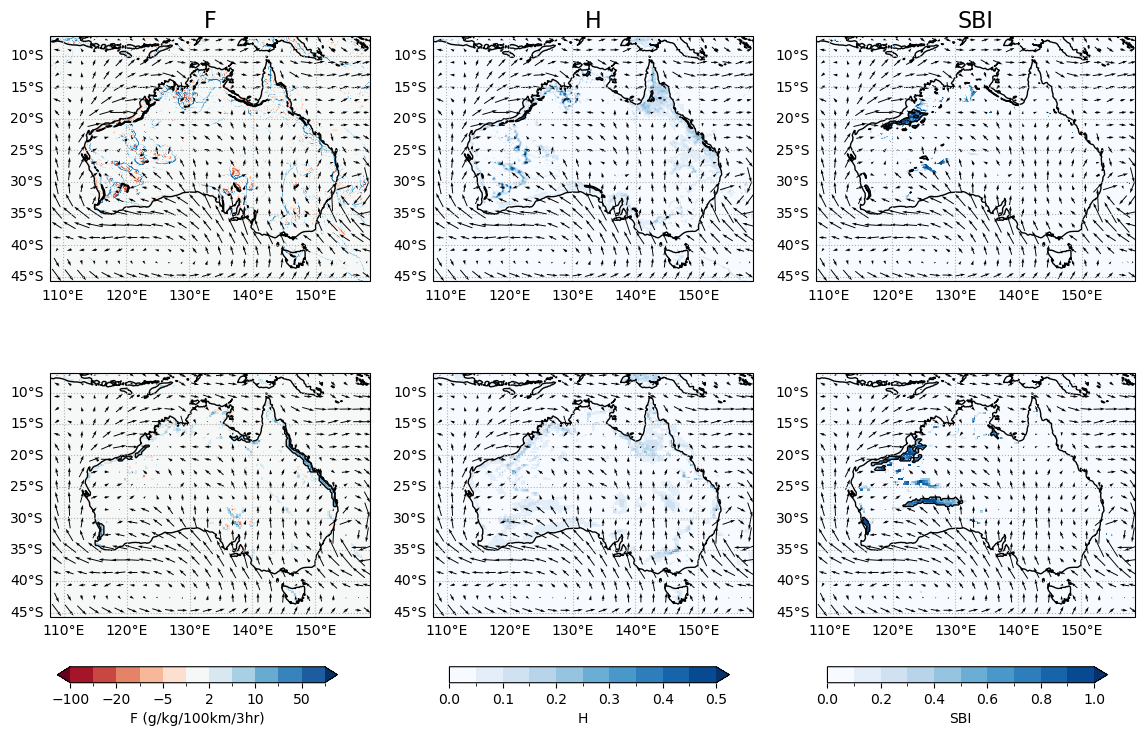

In [24]:

plt.figure(figsize=[14,8])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
f_a.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(f_am.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("F",size=16)


ax=plt.subplot(2,3,4,projection=ccrs.PlateCarree())
cf=f_e.sel(lat=lat_slice,lon=lon_slice,time=t).F.plot(levels=F_levels,extend="both",cmap="RdBu",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(f_em.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("")




ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
h_a.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(h_am.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("H",size=16)

ax=plt.subplot(2,3,5,projection=ccrs.PlateCarree())
ch=h_e.sel(lat=lat_slice,lon=lon_slice,time=t).__xarray_dataarray_variable__.plot(levels=fuzzy_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(h_em.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("")




ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
sbi_a.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(sbi_am.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":aus2200_uas,"v":aus2200_vas}).sel(time=t).coarsen({"lat":ca,"lon":ca},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("SBI",size=16)

ax=plt.subplot(2,3,6,projection=ccrs.PlateCarree())
csbi=sbi_e.sel(lat=lat_slice,lon=lon_slice,time=t).sbi.plot(levels=sbi_levels,extend="max",cmap="Blues",add_colorbar=False)
ax.coastlines()
ax.gridlines(ls=":",draw_labels=["left","bottom"])
xr.plot.contour(sbi_em.sel(lat=lat_slice,lon=lon_slice,time=t).mask,
            levels=1,
            colors="k",
            linewidths=lw,
            ax=ax)
xr.Dataset({"u":era5_uas,"v":era5_vas}).sel(time=t).coarsen({"lat":ce,"lon":ce},boundary="pad").mean().plot.quiver(
    ax=ax,
    x="lon",
    y="lat",
    u="u",
    v="v",
    scale=scale,
    width=width,
    add_guide=False)
plt.title("")


cb=plt.colorbar(cf,plt.axes([0.13,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("F (g/kg/100km/3hr)")
cb=plt.colorbar(ch,plt.axes([0.41,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("H")
cb=plt.colorbar(csbi,plt.axes([1-0.32,0.05,0.2,0.02]),orientation="horizontal"); cb.set_label("SBI")